In [7]:
#load all necessaries files 
import time
init_time = time.time()
import numpy as np
from functions import ClusterMerits, AuxiliarFunctions
from sklearn.cluster import KMeans
from numpy import linalg as LA

path = "/home/micael/MyWorkspace/DATA"

signal = np.load(path+"/"+"lvbb125Matrix.npy")[0:5000,:]
#ZZ = np.load(path+"/"+"ZZMatrix.npy")[0:5000,:]
TTbar = np.load(path+"/"+"TTbarMatrix.npy")[0:5000,:]

bkg = TTbar
#bkg = np.append(ZZ,TTbar,axis=0)
all_data = np.append(signal,bkg,axis=0)

current_time = time.time()
print 'Time to load all files: %1.3f seconds'%(current_time-init_time)

Time to load all files: 0.010 seconds


In [19]:
import matplotlib.pyplot as plt
kms = KMeans(n_clusters=4, init='k-means++', n_init=15, max_iter=300, tol=0.0001, precompute_distances='auto',
             verbose=0, random_state=None, copy_x=True)
kms.fit(all_data)
#for j in range(all_data.shape[1]):
#    if j == 23:
#        for i in set(kms.labels_):
#            index = kms.labels_ == i
#            plt.plot(all_data[index,j], all_data[index,j-23], 'o')
#        plt.show()
#    else:
#        for i in set(kms.labels_):
#            index = kms.labels_ == i
#            plt.plot(all_data[index,j], all_data[index,j+1], 'o')
#        plt.show()

#zip(all_data, kms.labels_)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=15,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [24]:
output = kms.predict(all_data)
cluster_list = []
for i in range(4):
    cluster_list.append(all_data[output==i,:])
print '======================================='
print 'F_0', ClusterMerits.DispTotal(all_data,ClusterMerits.Baricenter(all_data),media='')
print '======================================='
F_in = ClusterMerits.DistIntraClass(cluster_list)
print 'F_in', F_in
F_out = ClusterMerits.DispInterClass(cluster_list,all_data)
print 'F_out', F_out
print '========================================'
print 'F_in + F_out', F_in+F_out

F_0 203658708.105
F_in 81071734.4907
F_out 122586973.614
F_in + F_out 203658708.105


In [22]:
cluster_list

[array([[  8.88992194e-03,  -4.12412977e-04,   5.67766791e-03, ...,
           1.21762311e+00,   1.39726516e+02,   6.15567327e+01],
        [  4.44732159e-02,   0.00000000e+00,   7.22116008e-02, ...,
          -1.23155820e+00,   1.25057570e+02,   4.33235559e+01],
        [  7.04495683e-02,   1.44251147e-02,   6.44110441e-02, ...,
          -1.92413545e+00,   3.56549688e+01,   3.03942245e+01],
        ..., 
        [  2.27541644e-02,   1.25240356e-01,   1.66044727e-01, ...,
           1.78996480e+00,   1.20207500e+02,   1.74243960e+01],
        [  3.27443480e-02,   1.87768545e-02,   3.41251232e-02, ...,
          -3.37081313e-01,   1.71266063e+02,   5.28287034e+01],
        [  4.58100811e-02,   0.00000000e+00,   6.66991174e-02, ...,
           1.15951121e+00,   5.25115898e+01,   4.30427466e+01]]),
 array([[  5.98841161e-02,   0.00000000e+00,   9.51808691e-02, ...,
          -1.11174643e+00,   2.35005016e+02,   6.26179353e+01],
        [  1.30585432e-02,   3.76276433e-01,   4.47553545e-0

In [51]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=10, centers=3, n_features=5,
                  random_state=None)

X,y

(array([[ -4.7042472 ,  -4.34894932,  -0.20919955,  -0.25611799,
          -5.17309643],
        [ -2.73202649,   5.53470968,   1.7782047 ,  -7.68327204,
          -8.73247153],
        [ -0.88275598,   7.3024134 ,   0.07248934,  -7.50886698,
          -9.58945047],
        [  2.2456182 ,  10.1117849 ,  -5.86100174,   7.64062692,   7.2992319 ],
        [  2.18929653,   9.71742535,  -5.03822367,   9.46504718,
           7.58716174],
        [ -1.30601477,   5.27765447,   0.02787309,  -8.54852304,
          -9.02193527],
        [  2.74713853,  10.36112133,  -5.90702879,   8.33766806,
           6.99334832],
        [  2.81225039,   9.55345901,  -3.71123904,  10.05220293,
           8.67386148],
        [ -5.87132733,  -4.06795026,  -1.53507566,  -1.20840973,
          -7.31105146],
        [ -5.8932366 ,  -4.81608832,  -0.23085273,  -1.56373731,
          -5.87521114]]), array([2, 1, 1, 0, 0, 1, 0, 0, 2, 2]))

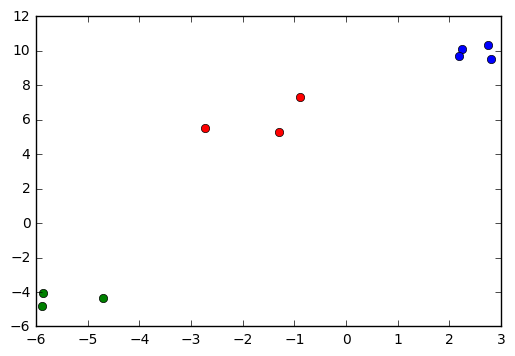

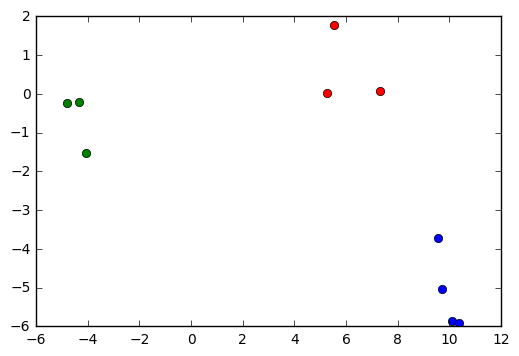

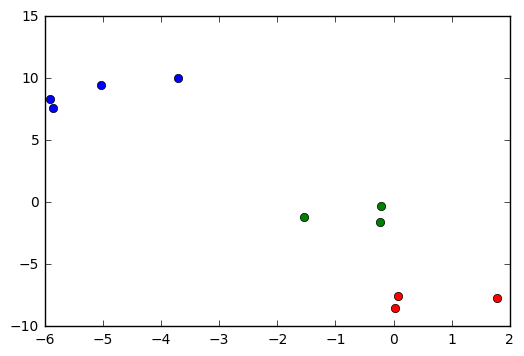

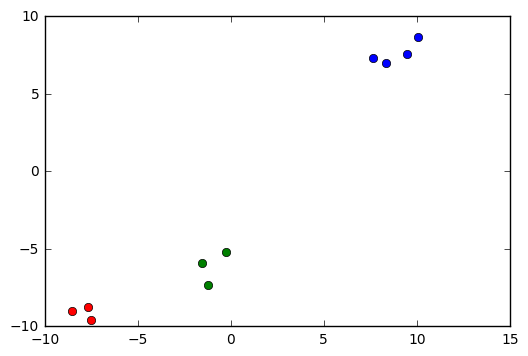

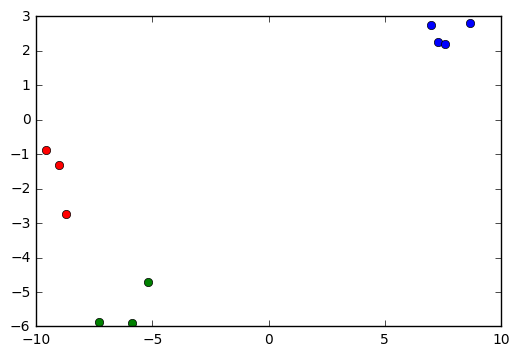

[(array([-4.7042472 , -4.34894932, -0.20919955, -0.25611799, -5.17309643]), 1),
 (array([-2.73202649,  5.53470968,  1.7782047 , -7.68327204, -8.73247153]), 2),
 (array([-0.88275598,  7.3024134 ,  0.07248934, -7.50886698, -9.58945047]), 2),
 (array([  2.2456182 ,  10.1117849 ,  -5.86100174,   7.64062692,   7.2992319 ]),
  0),
 (array([ 2.18929653,  9.71742535, -5.03822367,  9.46504718,  7.58716174]), 0),
 (array([-1.30601477,  5.27765447,  0.02787309, -8.54852304, -9.02193527]), 2),
 (array([  2.74713853,  10.36112133,  -5.90702879,   8.33766806,   6.99334832]),
  0),
 (array([  2.81225039,   9.55345901,  -3.71123904,  10.05220293,   8.67386148]),
  0),
 (array([-5.87132733, -4.06795026, -1.53507566, -1.20840973, -7.31105146]), 1),
 (array([-5.8932366 , -4.81608832, -0.23085273, -1.56373731, -5.87521114]), 1)]

In [63]:
import matplotlib.pyplot as plt
kms = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto',
             verbose=0, random_state=None, copy_x=True)
kms.fit(X)
for j in range(X.shape[1]):
    if j == 4:
        for i in set(kms.labels_):
            index = kms.labels_ == i
            plt.plot(X[index,j], X[index,j-4], 'o')
        plt.show()
    else:
        for i in set(kms.labels_):
            index = kms.labels_ == i
            plt.plot(X[index,j], X[index,j+1], 'o')
        plt.show()

zip(X, kms.labels_)

In [70]:
# how to access a cluster
output = kms.predict(X)
print kms.cluster_centers_
print '==============================='
print X[output==0,:]
print ClusterMerits.Baricenter(X[output==0,:])

[[ 2.49857592  9.93594765 -5.12937331  8.87388628  7.63840086]
 [-5.48960371 -4.41099596 -0.65837598 -1.00942168 -6.11978634]
 [-1.64026575  6.03825919  0.62618904 -7.91355402 -9.11461909]]
[[  2.2456182   10.1117849   -5.86100174   7.64062692   7.2992319 ]
 [  2.18929653   9.71742535  -5.03822367   9.46504718   7.58716174]
 [  2.74713853  10.36112133  -5.90702879   8.33766806   6.99334832]
 [  2.81225039   9.55345901  -3.71123904  10.05220293   8.67386148]]
[ 2.49857592  9.93594765 -5.12937331  8.87388628  7.63840086]


In [11]:
B = np.array([[1, 2],[3, 4]])
C = np.array([[5, 1],[3, 2]])
D = np.append(B,C,axis=0)
clt = []
clt.append(B)
clt.append(C)

print '==================='
print 'F_0', ClusterMerits.DispTotal(D,ClusterMerits.Baricenter(D),media='')
print '==================='

F_in = ClusterMerits.DistIntraClass(clt)
F_out = ClusterMerits.DispInterClass(clt,D)
print F_out
print 'F_in + F_out', F_in+F_out

F_0 12.75
6.25
F_in + F_out 12.75
